## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [188]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [189]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616
text_tokens = text

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [190]:
# Join all the strings into one and lowercase it
# Put result into variable text.
text_tokens = ''.join(text_tokens)
text_tokens = text_tokens.lower()

# Your great code here

assert len(text_tokens) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text_tokens) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

OK!


### Data loading: "Евгений Онегин"


In [191]:
# !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
# with open('onegin.txt', 'r') as iofile:
#     text = iofile.readlines()
    
# text = [x.replace('\t\t', '') for x in text]

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [192]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here

## Dictionary generation

Put all the characters, that you've seen in the text, into variable `tokens`.

In [193]:
text_tokens = set(text_tokens)
text_tokens.add('')
tokens = sorted(text_tokens)

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [194]:
# dict <index>:<char>
# Your great code here
token_to_idx = {token: idx for idx, token in enumerate(tokens)}

# dict <char>:<index>
# Your great code here
idx_to_token = {token_to_idx[token] : token for token in tokens}

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

Тогда вместо embending надо использовать one hot

In [195]:
token_to_idx

{'': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 "'": 4,
 '(': 5,
 ')': 6,
 ',': 7,
 '-': 8,
 '.': 9,
 ':': 10,
 ';': 11,
 '?': 12,
 'a': 13,
 'b': 14,
 'c': 15,
 'd': 16,
 'e': 17,
 'f': 18,
 'g': 19,
 'h': 20,
 'i': 21,
 'j': 22,
 'k': 23,
 'l': 24,
 'm': 25,
 'n': 26,
 'o': 27,
 'p': 28,
 'q': 29,
 'r': 30,
 's': 31,
 't': 32,
 'u': 33,
 'v': 34,
 'w': 35,
 'x': 36,
 'y': 37,
 'z': 38}

In [196]:
text

['  From fairest creatures we desire increase,\n',
 "  That thereby beauty's rose might never die,\n",
 '  But as the riper should by time decease,\n',
 '  His tender heir might bear his memory:\n',
 '  But thou, contracted to thine own bright eyes,\n',
 "  Feed'st thy light's flame with self-substantial fuel,\n",
 '  Making a famine where abundance lies,\n',
 '  Thy self thy foe, to thy sweet self too cruel:\n',
 "  Thou that art now the world's fresh ornament,\n",
 '  And only herald to the gaudy spring,\n',
 '  Within thine own bud buriest thy content,\n',
 "  And tender churl mak'st waste in niggarding:\n",
 '    Pity the world, or else this glutton be,\n',
 "    To eat the world's due, by the grave and thee.\n",
 '\n',
 '  II\n',
 '\n',
 '  When forty winters shall besiege thy brow,\n',
 "  And dig deep trenches in thy beauty's field,\n",
 "  Thy youth's proud livery so gazed on now,\n",
 "  Will be a tatter'd weed of small worth held:\n",
 '  Then being asked, where all thy beaut

## Text preprocessing

Надо избавится от \n

In [197]:
def clean_slash(row):
    row = row.replace('\n', '')
    return row.lower()

new_text = [clean_slash(string) for string in text]
new_text = [s for s in new_text if len(s) != 0]
new_text

['  from fairest creatures we desire increase,',
 "  that thereby beauty's rose might never die,",
 '  but as the riper should by time decease,',
 '  his tender heir might bear his memory:',
 '  but thou, contracted to thine own bright eyes,',
 "  feed'st thy light's flame with self-substantial fuel,",
 '  making a famine where abundance lies,',
 '  thy self thy foe, to thy sweet self too cruel:',
 "  thou that art now the world's fresh ornament,",
 '  and only herald to the gaudy spring,',
 '  within thine own bud buriest thy content,',
 "  and tender churl mak'st waste in niggarding:",
 '    pity the world, or else this glutton be,',
 "    to eat the world's due, by the grave and thee.",
 '  ii',
 '  when forty winters shall besiege thy brow,',
 "  and dig deep trenches in thy beauty's field,",
 "  thy youth's proud livery so gazed on now,",
 "  will be a tatter'd weed of small worth held:",
 '  then being asked, where all thy beauty lies,',
 '  where all the treasure of thy lusty da

In [198]:
max_len = max(map(len, new_text))
max_len

62

In [199]:
import numpy as np

def to_matrix(
    strings, max_len=None, pad=token_to_idx[''], dtype='int32', batch_first=True
    ):
    """Casts a list of names into rnn-digestable matrix"""
    
    max_len = max_len or max(map(len, strings))
    max_len += 1
    strings_ix = np.zeros([len(strings), max_len], dtype) + pad

    for i in range(len(strings)):
        line_ix = [token_to_idx[c] for c in strings[i]]
        strings_ix[i, 1:len(line_ix)] = line_ix[1:]

        
    if not batch_first: # convert [batch, time] into [time, batch]
        strings_ix = np.transpose(strings_ix)

    return strings_ix

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [200]:
import torch
import torch.nn as nn

In [201]:
class VanillaRNNModel(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=18, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        self.num_tokens = num_tokens
        
        #self.embedding = nn.Embedding(num_tokens, embedding_size)
        self.embedding = nn.Linear(num_tokens, embedding_size)

        self.rnn_update = nn.Linear(embedding_size + rnn_num_units, rnn_num_units)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, h_prev):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        # get vector embedding of x
        x_emb = self.embedding(torch.nn.functional.one_hot(x, self.num_tokens).type(torch.FloatTensor))
        
        # compute next hidden state using self.rnn_update
        # hint: use torch.cat(..., dim=...) for concatenation
        x_and_h = torch.cat([x_emb, h_prev], dim=1)
        h_next = self.rnn_update(x_and_h)
        
        h_next = torch.tanh(h_next)
        
        assert h_next.size() == h_prev.size()
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)

        #to_log
        logits_logp = torch.nn.functional.log_softmax(logits, -1)
        
        return h_next, logits_logp
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)


In [202]:
def rnn_loop(char_rnn, batch_ix):
    """
    Computes log P(next_character) for all time-steps in names_ix
    :param names_ix: an int32 matrix of shape [batch, time], output of to_matrix(names)
    """
    batch_size, max_length = batch_ix.size()
    hid_state = char_rnn.initial_state(batch_size)
    logits = []

    for x_t in batch_ix.transpose(0,1):
        hid_state, logits_next = char_rnn(x_t, hid_state)  # <-- here we call your one-step code
        logits.append(logits_next)
        
    return torch.stack(logits, dim=1)


Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [203]:
from IPython.display import clear_output
from random import sample

char_rnn = VanillaRNNModel()
opt = torch.optim.Adam(char_rnn.parameters())
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx[''])

history = []

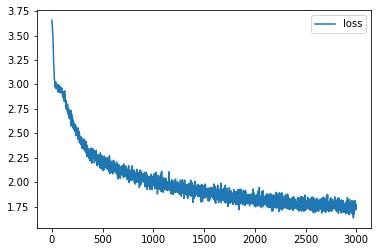

In [204]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import os

MAX_LENGTH = max_len
num_tokens = len(tokens)

for i in range(3000):
    batch_ix = to_matrix(sample(new_text, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logits_seq = rnn_loop(char_rnn, batch_ix)
    
    # compute loss
    #
    predictions_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
    predictions_logits.reshape((-1, num_tokens)),
    actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."



In [214]:
def generate_sample(char_rnn, seed_phrase='love', max_length=MAX_LENGTH, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        #print(x_sequence[:, -1].shape, hid_state.shape)
        hid_state, out = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        #print(x_sequence.shape, x_sequence, hid_state.shape)
        hid_state, out = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        p_next = torch.nn.functional.softmax(out / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        #print(p_next.shape, len(tokens))
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        #print(x_sequence.shape, next_ix.shape)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [215]:
print(generate_sample(char_rnn, max_length=80, temperature=0.2))

love the should the prower of that the prower the sweet the spall the will the s


In [216]:
print(generate_sample(char_rnn, max_length=80, temperature=0.2, seed_phrase='she'))

she so shall the swill my love the spert the some the will the to live the still


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

In [220]:
class LSTMRNNModel(nn.Module):
    """
    Implement the scheme above as torch module
    """
    def __init__(self, num_tokens=len(tokens), embedding_size=18, rnn_num_units=64):
        super(self.__class__,self).__init__()
        self.num_units = rnn_num_units
        self.num_tokens = num_tokens
        
        self.embedding = nn.Linear(num_tokens, embedding_size)
        self.rnn_update = nn.LSTM(num_tokens, rnn_num_units, batch_first=True)
        self.rnn_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, hidden):
        """
        This method computes h_next(x, h_prev) and log P(x_next | h_next)
        We'll call it repeatedly to produce the whole sequence.
        
        :param x: batch of character ids, containing vector of int64
        :param h_prev: previous rnn hidden states, containing matrix [batch, rnn_num_units] of float32
        """
        if hidden is None:
            hidden = self.initial_state(1)

        # get vector embedding of x
        x_emb = self.embedding(torch.nn.functional.one_hot(x, self.num_tokens).type(torch.FloatTensor))

        # compute next hidden state using self.rnn_update
        h_next, hidden = self.rnn_update(x_emb, hidden)
        
        #compute logits for next character probs
        logits = self.rnn_to_logits(h_next)

        #to_log
        logits_logp = torch.nn.functional.log_softmax(logits, -1)
        
        return hidden, logits_logp
    
    def initial_state(self, batch_size):
        """ return rnn state before it processes first input (aka h0) """
        return torch.zeros(batch_size, self.num_units, requires_grad=True)

In [221]:
lstm_rnn = VanillaRNNModel()
opt = torch.optim.Adam(lstm_rnn.parameters())
loss_func = nn.CrossEntropyLoss(ignore_index=token_to_idx[''])

history = []

Plot the loss function of the number of epochs. Does the final loss become better?

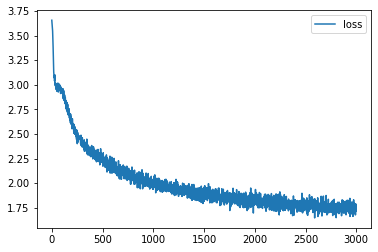

In [222]:
for i in range(3000):
    batch_ix = to_matrix(sample(new_text, 32), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)
    
    logits_seq = rnn_loop(lstm_rnn, batch_ix)
    
    # compute loss
    #
    predictions_logits = logits_seq[:, :-1]
    actual_next_tokens = batch_ix[:, 1:]

    loss = loss_func(
    predictions_logits.reshape((-1, num_tokens)),
    actual_next_tokens.reshape(-1)
    )
    loss.backward()
    opt.step()
    
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."


Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [224]:
temperatures = [0.1, 0.2, 0.5, 1.0, 2.0]

for temp in temperatures:
    print(generate_sample(lstm_rnn, seed_phrase='love', max_length=80, temperature=temp))


love the love the songure the storth the songure the storth the songure the stor
love shate the storth that the stall the with the see the storth that the so sti
love theresses thou the reare thy sunver with the love as that of thee be would 
love thou their buingnts jose, by mieps for mind, nor my fore unceirithart, thy 
love-'d'd; mlvadd? hes.ivhy,.'sm-winke,eo,,. eotsby deaby?d, fiy, rund, eakn.r! 


С более высокой температурой кажется текст генерируется хуже, потому что появляются всякие знаки препинания внутри слова и уже слова становятся неправильными. Так что лучшая температура это 0.2-0.3

Но  в моем случае lstm не дал сильно лучших результатов, может быть это из за данного нам текста или из за не очень корректного lstm

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [227]:
torch.save(lstm_rnn, "./lstm_rnn_model")
model = torch.load("./lstm_rnn_model")

In [229]:
print(generate_sample(model, max_length=80, temperature=0.2, seed_phrase=' '))

 my love the beauty the live the seed the sare the should the shall the songure 


### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)